# Common Layer API, Pretrained Models and Other Exercises


The idea in this notebook is to use the MNIST classification problem to use a number of different deep learning elements, combine them and experiment with them to get into a full workflow. The linear model used in the previous workshops has been implemented with the linear model itself ($y = mx+b$) is encapsulated in the function `tf_utils.simple_model`. 


You will primarily be replacing this function with more complex deep learning architectures. Try playing with as many components as you can try different non-linear activations, optimization rules, initializations, layer combinations and auxilliary DL layers like drop out and batch norm. While based in theory, the way deep learning components combine has a large element of experience.

### Imports

In [1]:
## Imports
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

import utils
import tf_utils

### Load Data


In [4]:
### load the data 
mnist = tf.keras.datasets.mnist


(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


num_train = x_train.shape[0]
num_test = x_test.shape[0]
# The images are stored in one-dimensional arrays of this length.
img_size_flat = x_train[0].flatten().shape[0]

# Tuple with height and width of images used to reshape arrays.
img_shape = x_train[0].shape
H,W = img_shape
num_classes = len(np.unique(y_train))

print("Flattened Image Size = \t\t{}".format(img_size_flat))
print("Image Shape = \t\t\t{}".format(img_shape))
print("Number of label classes = \t{}".format(num_classes))

Flattened Image Size = 		784
Image Shape = 			(28, 28)
Number of label classes = 	10


### Problem Set

The below code will write a simple linear model and optimize it with back propogation. Make the following additions to the code.

* Add a saver and save the optimized model with a unique name.
* Add tensorboard summaries for accuracy and loss and confirm they are being written out
* For each of the following functions in  __tf_utils.py__ :
    * complete the function 
    * optimize models using them in place of `tf_utils.simple_model`
    * save the optimized model with a unique name
    * write out __cost__ and __accuracy__ to tensorboard and compare them to the other models.


Functions: `fc_model`,`convolutional_model`,`lstm_model`,`fc_custom_model`

Accuracy on test-set: 90.9%


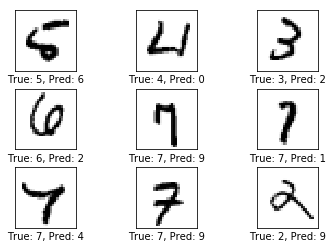

In [18]:
### Hyper parameters
num_iterations = 1000
batch_size = 100
learning_rate = 0.5
display_freq = 100

### This will erase the computational graph in memory
tf.reset_default_graph()


#######################################
### define the computational graph ####
#######################################
with tf.variable_scope('inputs'):
    x = tf.placeholder(tf.float32, [None, H,W])
    y_true_cls = tf.placeholder(tf.int64, [None])

    
with tf.variable_scope('model_ops'):
    # define model parameters
    y_pred,y_pred_cls,logits = tf_utils.simple_model(x,y_true_cls)
    
    
with tf.variable_scope('loss_ops'): 
    cost = tf_utils.cross_entropy_loss(y_true_cls,logits)

with tf.variable_scope('optimization_ops'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

with tf.variable_scope('metrics'):
    correct_prediction = tf.equal(y_pred_cls, y_true_cls)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Add tensor board summaries    
with tf.variable_scope('tensorboard'):
    pass

###########################################################################################
###########################################################################################
    
### CREATE SAVER ###    
    
### Start a session to train and test the model    
with tf.Session() as sess:
    ### Initialize model parameters
    tf.global_variables_initializer().run()
    ### Optimize model parameters 
    for i in range(num_iterations):
        x_batch, y_true_batch, _ = utils.batch_data(x_train,y_train,batch_size=batch_size)
        feed_dict = {x: x_batch,
                    y_true_cls: y_true_batch}

        sess.run(optimizer, feed_dict=feed_dict) 
        
        
    ### Output metrics    
    feed_dict_test = {x: x_test,
                  y_true_cls: y_test}
    utils.print_accuracy(sess,accuracy,feed_dict_test)
    utils.plot_example_errors(x_test,y_test,sess,[correct_prediction,y_pred_cls],feed_dict_test)
    
    
    
    ### SAVE MODEL ###
    
